In [2]:
import numpy as np
import pandas as pd

# Make random number generator
rng = np.random.default_rng()

# Safe Pandas
pd.set_option('mode.copy_on_write', True)

# Plotting
import matplotlib.pyplot as plt

In [37]:
# Estimated group size
n = 20

In [38]:
# Creating initial pain scores from ethnographic data
real_pain_scores = np.array([8,8,5,2])
mean_pain_score = np.mean(real_pain_scores) 
std_dev_pain_score = np.std(real_pain_scores)
print("mean pain score:", mean_pain_score)
print("std dev pain score:", std_dev_pain_score)

mean pain score: 5.75
std dev pain score: 2.48746859276655


In [39]:
# start with one estimated group size 
n = 20

# create a dataframe for our simulated patient data
patient_df = pd.DataFrame()
patient_df['group'] = np.repeat(['Experimental', 'Control'], [n, n])
pre_mean = 5.75
pre_std = 2.48
initial_pain = rng.normal(pre_mean, pre_std, size=n * 2)
patient_df['initial pain score'] = np.clip(np.round(initial_pain), 1, 10)
patient_df

,group,initial pain score
0,Experimental,7.0
1,Experimental,6.0
2,Experimental,1.0
3,Experimental,5.0
4,Experimental,8.0
5,Experimental,6.0
6,Experimental,6.0
7,Experimental,6.0
8,Experimental,4.0
9,Experimental,5.0


In [40]:
# Now we simulate the post-pain scores for each group assuming that there will be between a +1/-1 difference in pain scores for each patient
within_mean = -1
within_std = 1
within_difference = rng.normal(within_mean, within_std, size=n * 2)
patient_df['post pain score'] = np.clip(np.round(initial_pain + within_difference), 1, 10)
patient_df

,group,initial pain score,post pain score
0,Experimental,7.0,7.0
1,Experimental,6.0,4.0
2,Experimental,1.0,1.0
3,Experimental,5.0,4.0
4,Experimental,8.0,6.0
5,Experimental,6.0,8.0
6,Experimental,6.0,5.0
7,Experimental,6.0,6.0
8,Experimental,4.0,3.0
9,Experimental,5.0,2.0


### Estimating VR effect size ###
The anonymous ethnographic data provides four patients pain scores before and after trialing a 7 minute 'self care' immersive VR therapy. I'll compute the differences between the pain scores before and after the VR session for each patient, calculate the mean and standard deviation of these differences and use this to calculate Cohen's d (the mean difference divided by the standard deviation of the differences) to determine a reasonable estimate for effect size. 

In [41]:
# Assuming that the VR treatment will have a mean effect of -1 on pain scores and that the standard deviation of the effect is 1
vr_mean = -1  # Estimated average effect of VR
vr_std = 1  # STD
vr_effect = np.zeros(n * 2)
vr_effect[:n] = rng.normal(vr_mean, vr_std, size=n)
vr_effect

array([-0.05356914, -0.85097792, -3.11113097, -2.25188447,  0.17931785,
       -1.42501369, -1.62037254, -1.90701417,  1.07537624, -0.02231353,
       -1.21054063, -1.93574423, -1.47663963, -0.71058433, -0.48919804,
       -0.34917085, -1.82422085,  0.32421185,  0.20970671, -2.04815237,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [42]:
# Now we can update the VR effect to the post-pain scores 
patient_df['post pain score'] = np.clip(np.round(initial_pain + within_difference + vr_effect), 1, 10)
patient_df

,group,initial pain score,post pain score
0,Experimental,7.0,7.0
1,Experimental,6.0,3.0
2,Experimental,1.0,1.0
3,Experimental,5.0,2.0
4,Experimental,8.0,6.0
5,Experimental,6.0,6.0
6,Experimental,6.0,3.0
7,Experimental,6.0,4.0
8,Experimental,4.0,4.0
9,Experimental,5.0,2.0


In [43]:
# what we're interested in is the difference in pain scores (per patient) post the VR treatment vs the control treatment
patient_df['difference'] = patient_df['initial pain score'] - patient_df['post pain score']
patient_df

,group,initial pain score,post pain score,difference
0,Experimental,7.0,7.0,0.0
1,Experimental,6.0,3.0,3.0
2,Experimental,1.0,1.0,0.0
3,Experimental,5.0,2.0,3.0
4,Experimental,8.0,6.0,2.0
5,Experimental,6.0,6.0,0.0
6,Experimental,6.0,3.0,3.0
7,Experimental,6.0,4.0,2.0
8,Experimental,4.0,4.0,0.0
9,Experimental,5.0,2.0,3.0


### Permutation testing ###

In [44]:
# calculate the mean difference in pain scores and display by group
diffs = patient_df.groupby('group')['difference'].mean()
diffs

group
Control         1.05
Experimental    1.55
Name: difference, dtype: float64

In [45]:
# calculate the actual difference in pain scores between the two groups, we estimated that the VR treatment would have a mean effect of -1 on pain scores
actual_diff = diffs['Experimental'] - diffs['Control']
actual_diff

0.5

In [46]:
differences = np.array(patient_df['difference'])


In [47]:
# Simulate one trial
shuffled = rng.permutation(differences)
fake_diff = np.mean(shuffled[:n]) - np.mean(shuffled[n:])
fake_diff

-0.7

In [48]:
import scipy.stats as sps

In [49]:
# t-test version of the permutation test.  Permutation will give you similar p-value.
sps.ttest_ind(differences[:n], differences[n:])

TtestResult(statistic=1.2006573818996689, pvalue=0.23731530531602504, df=38.0)

Ok so we have successfully simulated one trial with a p-value of 0.080 (not statistically significant). Next I'll write a function to simulate multiple trials to estimate the power of the study. I'll vary the sample size and calculate the power for each sample size. 

In [54]:
def simulate_trial(n, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std, n_permutations=10000):
    rng = np.random.default_rng()
    
    # Create initial pain scores
    initial_pain = rng.normal(pre_mean, pre_std, size=n * 2)
    initial_pain = np.clip(np.round(initial_pain), 1, 10)
    
    # Create dataframe for simulated patient data
    patient_df = pd.DataFrame()
    patient_df['group'] = np.repeat(['Experimental', 'Control'], [n, n])
    patient_df['initial pain score'] = initial_pain
    
    # Simulate post-pain scores
    within_difference = rng.normal(within_mean, within_std, size=n * 2)
    vr_effect = np.zeros(n * 2)
    vr_effect[:n] = rng.normal(vr_mean, vr_std, size=n)
    patient_df['post pain score'] = np.clip(np.round(initial_pain + within_difference + vr_effect), 1, 10)
    
    # Calculate difference in pain scores
    patient_df['difference'] = patient_df['initial pain score'] - patient_df['post pain score']
    
    # Calculate actual difference between groups
    diffs = patient_df.groupby('group')['difference'].mean()
    actual_diff = diffs['Experimental'] - diffs['Control']
    
    # Permutation test
    differences = np.array(patient_df['difference'])
    perm_diffs = np.zeros(n_permutations)
    
    for i in range(n_permutations):
        shuffled = rng.permutation(differences)
        fake_diff = np.mean(shuffled[:n]) - np.mean(shuffled[n:])
        perm_diffs[i] = fake_diff
    
    p_value = np.sum(np.abs(perm_diffs) >= np.abs(actual_diff)) / n_permutations
    
    return p_value


In [66]:
# Define the number of simulations
n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 20

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.216


In [68]:
# new trial with 60 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 60

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.957


In [69]:
# new trial with 40 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 40

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.832


In [70]:
# new trial with 50 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 50

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.921


In [71]:
# new trial with 48 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 48

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.917


In [72]:
# new trial with 47 patients per group

n_simulations = 1000

# Define the sample size per group
n_patients_per_group = 47

# Define the parameters for the simulate_trial function
pre_mean = 5.75
pre_std = 2.48
vr_mean = -1
vr_std = 1
within_mean = -1
within_std = 1

# Initialize a list to store the p-values
p_values = []

# Run the simulations
for i in range(n_simulations):
    p_value = simulate_trial(n_patients_per_group, pre_mean, pre_std, within_mean, within_std, vr_mean, vr_std)
    p_values.append(p_value)

# Calculate the proportion of trials with p-value < 0.05
significant_results = sum(p < 0.05 for p in p_values)
proportion_significant = significant_results / n_simulations

# Print the result
print(f"Proportion of trials with p-value < 0.05: {proportion_significant:.3f}")

Proportion of trials with p-value < 0.05: 0.903


In [4]:
power_df = pd.DataFrame()
power_df['trial number'] = [1, 2, 3, 4, 5, 6]
power_df['group size'] = [20, 60, 40, 50, 48, 47]
power_df['proportion significant'] = [0.216, 0.957, 0.832, 0.921, 0.917, 0.903]
power_df.set_index('trial number', inplace=True)  
power_df  

,group size,proportion significant
trial number,,
1,20,0.216
2,60,0.957
3,40,0.832
4,50,0.921
5,48,0.917
6,47,0.903


In [12]:
desired_power = 0.80
min_sample_size = power_df[power_df['proportion significant'] >= desired_power]['group size'].min()

print(f"The minimum sample size required to achieve {desired_power * 100}% power is {min_sample_size}.")

The minimum sample size required to achieve 80.0% power is 40.


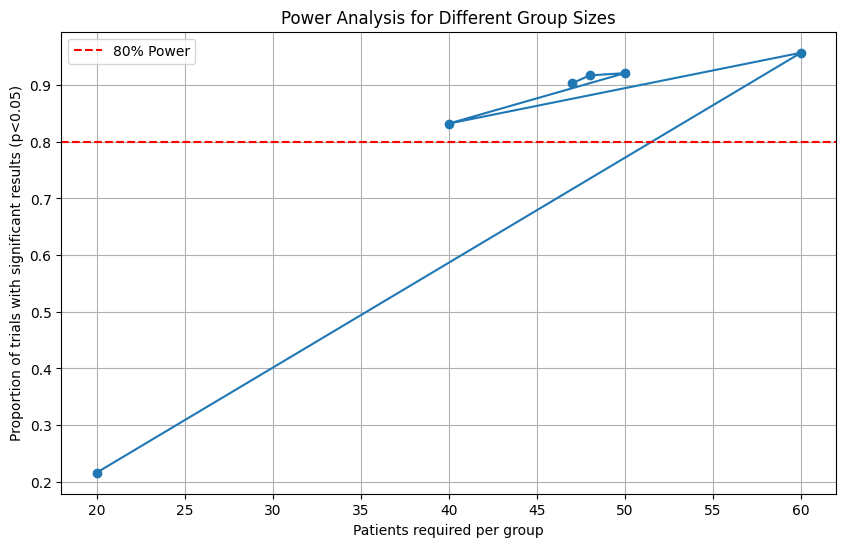

In [18]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(power_df['group size'], power_df['proportion significant'], marker='o')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Power')
plt.xlabel('Patients required per group')
plt.ylabel('Proportion of trials with significant results (p<0.05)')
plt.title('Power Analysis for Different Group Sizes')
plt.legend()
plt.grid(True)
plt.show()